## Exploratory Data Analysis

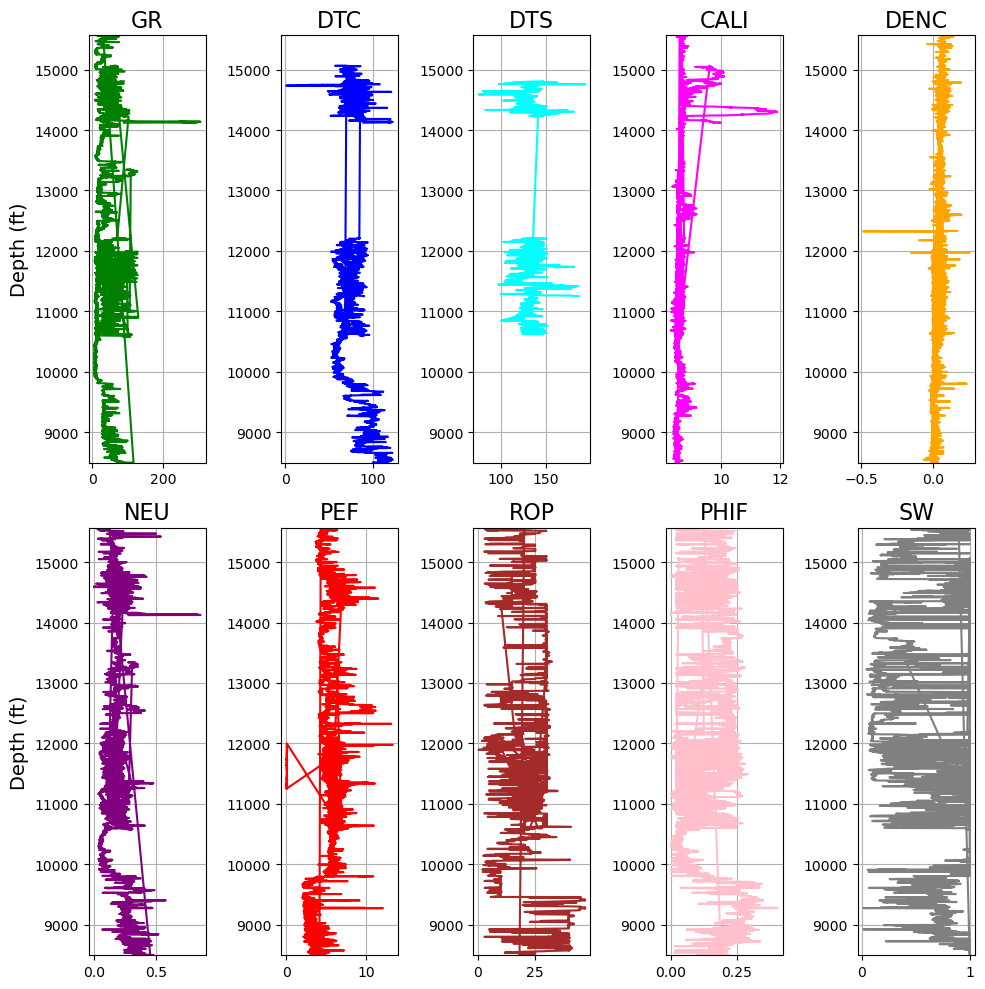

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)

depth = borehole_data['DEPTH'].values

# Define the features to plot (excluding WELLNUM)
features = ['GR', 'DTC', 'DTS', 'CALI', 'DENC', 'NEU', 'PEF', 'ROP', 'PHIF', 'SW']
feature_titles = ['GR', 'DTC', 'DTS', 'CALI', 'DENC', 'NEU', 'PEF', 'ROP', 'PHIF', 'SW']

# Colors for each plot
colors = ['green', 'blue', 'cyan', 'magenta', 'orange', 'purple', 'red', 'brown', 'pink', 'gray', 'teal']

# Create the subplots
n_features = len(features)
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate the number of rows needed

plt.figure(figsize=(10, n_rows * 5))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(borehole_data[feature].values, depth, color=colors[i])
    plt.title(feature_titles[i], fontsize=16)  # Increase the font size
    plt.xlabel('')  # Remove x-labels
    if i % n_cols == 0:
        plt.ylabel('Depth (ft)', fontsize=14)  # Increase the font size
    plt.ylim(max(depth), min(depth))  # Invert the y-axis
    plt.grid(True)
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Comparing Outlier Detection Methods

In [ ]:
#Import required libraries
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest

## 4.2.1 Baseline Predictions

In [1]:
##Linear Regression
# Load the data
file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)

# Filter out records where WELLNUM is 0
filtered_data = borehole_data[borehole_data['WELLNUM'] != 0]

# Split into train and test data
train_data = filtered_data[filtered_data['WELLNUM'] != 5]
test_data = filtered_data[filtered_data['WELLNUM'] == 5]

# Define the features and target variable
features = ['GR', 'ROP', 'DTC', 'PEF', 'DEN']
target = 'NEU'

# Prepare the train data by removing rows with missing 'NEU'
train_data_cleaned = train_data.dropna(subset=[target])

# Initialize Iterative Imputer
imputer = IterativeImputer(random_state=42)

# Fit and transform the training data to fill missing values
X_train = train_data_cleaned[features]
X_train_imputed = imputer.fit_transform(X_train)
y_train = train_data_cleaned[target]

# Prepare the test data
X_test = test_data[features]
y_test = test_data[target]

# Train the Linear Regression model with selected features
linear_model = LinearRegression()
linear_model.fit(X_train_imputed, y_train)

# Make predictions on the test data with selected features
y_pred = linear_model.predict(X_test)

# Evaluate the model's performance
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse_test}')
print(f'Root Mean Squared Error (RMSE): {rmse_test}')
print(f'R-squared (R²) Score: {r2_test}')

Mean Squared Error (MSE): 0.0007604931333087296
Root Mean Squared Error (RMSE): 0.02757703996640556
R-squared (R²) Score: 0.6350889565849414


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [2]:
##Random Forest
# Load the data
file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)

# Filter out records where WELLNUM is 0
filtered_data = borehole_data[borehole_data['WELLNUM'] != 0]

# Split into train and test data
train_data = filtered_data[filtered_data['WELLNUM'] != 5]
test_data = filtered_data[filtered_data['WELLNUM'] == 5]

# Define the features and target variable
features = ['GR', 'ROP', 'DTC', 'PEF', 'DEN']
target = 'NEU'

# Prepare the train data by removing rows with missing 'NEU'
train_data_cleaned = train_data.dropna(subset=[target])

# Initialize Iterative Imputer
imputer = IterativeImputer(random_state=42)

# Fit and transform the training data to fill missing values
X_train = train_data_cleaned[features]
X_train_imputed = imputer.fit_transform(X_train)
y_train = train_data_cleaned[target]

# Prepare the test data
X_test = test_data[features]
y_test = test_data[target]


random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_imputed, y_train)


# Make predictions on the test data with selected features
y_pred = random_forest_model.predict(X_test)

# Evaluate the model's performance
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse_test}')
print(f'Root Mean Squared Error (RMSE): {rmse_test}')
print(f'R-squared (R²) Score: {r2_test}')

Mean Squared Error (MSE): 0.0009731416050691422
Root Mean Squared Error (RMSE): 0.031195217663435883
R-squared (R²) Score: 0.5330528272472578


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## 4.2.2 Ratio-Based Predictions

In [3]:
##Linear Regression
# Load the data
file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)

# Filter out records where WELLNUM is 0
filtered_data = borehole_data[borehole_data['WELLNUM'] != 0]

# Split into train and test data
train_data = filtered_data[filtered_data['WELLNUM'] != 5]
test_data = filtered_data[filtered_data['WELLNUM'] == 5]

# Define the features and target variable
features = ['GR', 'ROP', 'DTC', 'PEF', 'DEN']
target = 'NEU'

# Define the value pairs
value_pairs = [(0.98, 1.02), (0.95, 1.05), (0.9, 1.10)]

# Iterate through the value pairs
for min_val, max_val in value_pairs:
    print(f'\nResults for {min_val} - {max_val}:')

    # Filter the train data based on the current value pair
    train_data_filtered = train_data[(train_data['CALI'] / train_data['BS'] > min_val) & 
                                     (train_data['CALI'] / train_data['BS'] < max_val)]

    # Prepare the train data by removing rows with missing 'NEU'
    train_data_cleaned = train_data_filtered.dropna(subset=[target])

    # Initialize Iterative Imputer
    imputer = IterativeImputer(random_state=42)

    # Fit and transform the training data to fill missing values
    X_train = train_data_cleaned[features]
    X_train_imputed = imputer.fit_transform(X_train)
    y_train = train_data_cleaned[target]

    # Prepare the test data
    X_test = test_data[features]
    y_test = test_data[target]

    # Train the Linear Regression model with selected features
    linear_model = LinearRegression()
    linear_model.fit(X_train_imputed, y_train)

    # Make predictions on the test data with selected features
    y_pred = linear_model.predict(X_test)

    # Evaluate the model's performance
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)

    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse_test}')
    print(f'Root Mean Squared Error (RMSE): {rmse_test}')
    print(f'R-squared (R²) Score: {r2_test}')


Results for 0.98 - 1.02:
Mean Squared Error (MSE): 0.000549354766249987
Root Mean Squared Error (RMSE): 0.02343831833238014
R-squared (R²) Score: 0.7364004851889472

Results for 0.95 - 1.05:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.000703519546808407
Root Mean Squared Error (RMSE): 0.026523942897095955
R-squared (R²) Score: 0.662426864037803

Results for 0.9 - 1.1:
Mean Squared Error (MSE): 0.0007604931333087296
Root Mean Squared Error (RMSE): 0.02757703996640556
R-squared (R²) Score: 0.6350889565849414


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [4]:
##Random Forest 
# Load the data
file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)

# Filter out records where WELLNUM is 0
filtered_data = borehole_data[borehole_data['WELLNUM'] != 0]

# Split into train and test data
train_data = filtered_data[filtered_data['WELLNUM'] != 5]
test_data = filtered_data[filtered_data['WELLNUM'] == 5]

# Define the features and target variable
features = ['GR', 'ROP', 'DTC', 'PEF', 'DEN']
target = 'NEU'

# Define the value pairs
value_pairs = [(0.98, 1.02), (0.95, 1.05), (0.9, 1.10)]

# Iterate through the value pairs
for min_val, max_val in value_pairs:
    print(f'\nResults for {min_val} - {max_val}:')

    # Filter the train data based on the current value pair
    train_data_filtered = train_data[(train_data['CALI'] / train_data['BS'] > min_val) & 
                                     (train_data['CALI'] / train_data['BS'] < max_val)]

    # Prepare the train data by removing rows with missing 'NEU'
    train_data_cleaned = train_data_filtered.dropna(subset=[target])

    # Initialize Iterative Imputer
    imputer = IterativeImputer(random_state=42)

    # Fit and transform the training data to fill missing values
    X_train = train_data_cleaned[features]
    X_train_imputed = imputer.fit_transform(X_train)
    y_train = train_data_cleaned[target]

    # Prepare the test data
    X_test = test_data[features]
    y_test = test_data[target]

    # Initialize and train the Random Forest model
    random_forest_model = RandomForestRegressor(random_state=42)
    random_forest_model.fit(X_train_imputed, y_train)

    # Make predictions on the test data with selected features
    y_pred = random_forest_model.predict(X_test)

    # Evaluate the model's performance
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)

    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse_test}')
    print(f'Root Mean Squared Error (RMSE): {rmse_test}')
    print(f'R-squared (R²) Score: {r2_test}')


Results for 0.98 - 1.02:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.000744350062364926
Root Mean Squared Error (RMSE): 0.02728277959381936
R-squared (R²) Score: 0.6428349632272331

Results for 0.95 - 1.05:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.000980854420715629
Root Mean Squared Error (RMSE): 0.031318595446086485
R-squared (R²) Score: 0.5293519501690095

Results for 0.9 - 1.1:
Mean Squared Error (MSE): 0.0009731416050691422
Root Mean Squared Error (RMSE): 0.031195217663435883
R-squared (R²) Score: 0.5330528272472578


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## 4.2.3 Results for Isolation Forest Prediction

In [5]:
##Linear Regression
# Load the data
file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)

# Filter out records where WELLNUM is 0
filtered_data = borehole_data[borehole_data['WELLNUM'] != 0]

# Split into train and test data
train_data = filtered_data[filtered_data['WELLNUM'] != 5]
test_data = filtered_data[filtered_data['WELLNUM'] == 5]

# Remove rows where 'NEU' is missing
train_data_cleaned = train_data.dropna(subset=['NEU'])

# Initialize Iterative Imputer
imputer = IterativeImputer(random_state=42)

# Define the features and target variable
features = ['GR', 'ROP', 'DTC', 'PEF', 'DEN']
target = 'NEU'

# Prepare the training data
X_train = train_data_cleaned[features]
X_train_imputed = imputer.fit_transform(X_train)
y_train = train_data_cleaned[target]

# Define contamination values
contamination_values = [0.1, 0.2, 0.25]

# Iterate through contamination values
for contamination in contamination_values:
    print(f'\nResults for Isolation Forest contamination: {contamination}')

    # Initialize Isolation Forest with the current contamination value
    iso_forest = IsolationForest(contamination=contamination, random_state=42)

    # Fit Isolation Forest to the imputed training data to identify outliers
    outliers = iso_forest.fit_predict(X_train_imputed)

    # Filter out the outliers from the training data
    mask = outliers != -1
    X_train_no_outliers = X_train_imputed[mask]
    y_train_no_outliers = y_train[mask]

    # Prepare the test data with the selected features
    X_test_selected = test_data[features]
    y_test = test_data[target]

    # Train the Linear Regression model with the selected features after removing outliers
    linear_model_no_outliers = LinearRegression()
    linear_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

    # Make predictions on the test data with the selected features
    y_pred_no_outliers = linear_model_no_outliers.predict(X_test_selected)

    # Evaluate the model's performance
    mse_test_no_outliers = mean_squared_error(y_test, y_pred_no_outliers)
    r2_test_no_outliers = r2_score(y_test, y_pred_no_outliers)
    rmse_test = mean_squared_error(y_test, y_pred_no_outliers, squared=False)

    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse_test_no_outliers}')
    print(f'Root Mean Squared Error (RMSE): {rmse_test}')
    print(f'R-squared (R²) Score: {r2_test_no_outliers}')


Results for Isolation Forest contamination: 0.1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0007214026501697519
Root Mean Squared Error (RMSE): 0.026858939855656103
R-squared (R²) Score: 0.6538459293504696

Results for Isolation Forest contamination: 0.2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0006734406770348357
Root Mean Squared Error (RMSE): 0.02595073557791447
R-squared (R²) Score: 0.67685975142768

Results for Isolation Forest contamination: 0.25
Mean Squared Error (MSE): 0.0006766899701324032
Root Mean Squared Error (RMSE): 0.02601326527240291
R-squared (R²) Score: 0.6753006276398872


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [6]:
##Random Forest
# Load the data
file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)

# Filter out records where WELLNUM is 0
filtered_data = borehole_data[borehole_data['WELLNUM'] != 0]

# Split into train and test data
train_data = filtered_data[filtered_data['WELLNUM'] != 5]
test_data = filtered_data[filtered_data['WELLNUM'] == 5]

# Remove rows where 'NEU' is missing
train_data_cleaned = train_data.dropna(subset=['NEU'])

# Initialize Iterative Imputer
imputer = IterativeImputer(random_state=42)

# Define the features and target variable
features = ['GR', 'ROP', 'DTC', 'PEF', 'DEN']
target = 'NEU'

# Prepare the training data
X_train = train_data_cleaned[features]
X_train_imputed = imputer.fit_transform(X_train)
y_train = train_data_cleaned[target]

# Define contamination values
contamination_values = [0.1, 0.15, 0.2, 0.25, 0.3]

# Iterate through contamination values
for contamination in contamination_values:
    print(f'\nResults for Isolation Forest contamination: {contamination}')

    # Initialize Isolation Forest with the current contamination value
    iso_forest = IsolationForest(contamination=contamination, random_state=42)

    # Fit Isolation Forest to the imputed training data to identify outliers
    outliers = iso_forest.fit_predict(X_train_imputed)

    # Filter out the outliers from the training data
    mask = outliers != -1
    X_train_no_outliers = X_train_imputed[mask]
    y_train_no_outliers = y_train[mask]

    # Prepare the test data with the selected features
    X_test_selected = test_data[features]
    y_test = test_data[target]

    # Train the Random Forest model with the selected features after removing outliers
    random_forest_model = RandomForestRegressor(random_state=42)
    random_forest_model.fit(X_train_no_outliers, y_train_no_outliers)

    # Make predictions on the test data with the selected features
    y_pred_no_outliers = random_forest_model.predict(X_test_selected)

    # Evaluate the model's performance
    mse_test_no_outliers = mean_squared_error(y_test, y_pred_no_outliers)
    r2_test_no_outliers = r2_score(y_test, y_pred_no_outliers)
    rmse_test = mean_squared_error(y_test, y_pred_no_outliers, squared=False)

    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse_test_no_outliers}')
    print(f'Root Mean Squared Error (RMSE): {rmse_test}')
    print(f'R-squared (R²) Score: {r2_test_no_outliers}')


Results for Isolation Forest contamination: 0.1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0009420984742874483
Root Mean Squared Error (RMSE): 0.030693622697352756
R-squared (R²) Score: 0.5479484005907442

Results for Isolation Forest contamination: 0.15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0009597078149532835
Root Mean Squared Error (RMSE): 0.030979151294915803
R-squared (R²) Score: 0.5394988267619001

Results for Isolation Forest contamination: 0.2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0009199468539143619
Root Mean Squared Error (RMSE): 0.030330625676275817
R-squared (R²) Score: 0.5585775181325534

Results for Isolation Forest contamination: 0.25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.000822216739010464
Root Mean Squared Error (RMSE): 0.028674321945086408
R-squared (R²) Score: 0.6054718247878869

Results for Isolation Forest contamination: 0.3
Mean Squared Error (MSE): 0.0008974558545236877
Root Mean Squared Error (RMSE): 0.029957567566871776
R-squared (R²) Score: 0.569369481525294


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## 4.2.4 Combined Approach

### Borehole FIlter First

In [7]:
##Linear Regression#
# Load the data
file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)

# Filter out records where WELLNUM is 0
filtered_data = borehole_data[borehole_data['WELLNUM'] != 0]

# Split into train and test data
train_data = filtered_data[filtered_data['WELLNUM'] != 5]
test_data = filtered_data[filtered_data['WELLNUM'] == 5]

# Apply CALI / BS filter
train_data_filtered = train_data[(train_data['CALI'] / train_data['BS'] > 0.98) & 
                                 (train_data['CALI'] / train_data['BS'] < 1.02)]

# Define the features and target variable
features = ['GR', 'ROP', 'DTC', 'PEF', 'DEN']
target = 'NEU'

# Prepare the train data by removing rows with missing 'NEU'
train_data_cleaned = train_data_filtered.dropna(subset=[target])

# Initialize Iterative Imputer
imputer = IterativeImputer(random_state=42)

# Fit and transform the training data to fill missing values
X_train = train_data_cleaned[features]
X_train_imputed = imputer.fit_transform(X_train)
y_train = train_data_cleaned[target]

# Define contamination values
contamination_values = [0.1, 0.15, 0.2]

# Iterate through contamination values
for contamination in contamination_values:
    print(f'\nResults for Isolation Forest contamination: {contamination}')

    # Apply Isolation Forest with the current contamination value
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outliers = iso_forest.fit_predict(X_train_imputed)

    # Filter out the outliers from the training data
    mask = outliers != -1
    X_train_no_outliers = X_train_imputed[mask]
    y_train_no_outliers = y_train[mask]

    # Prepare the test data
    X_test = test_data[features]
    y_test = test_data[target]

    # Train the Linear Regression model with selected features
    linear_model = LinearRegression()
    linear_model.fit(X_train_no_outliers, y_train_no_outliers)

    # Make predictions on the test data with selected features
    y_pred = linear_model.predict(X_test)

    # Evaluate the model's performance
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)

    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse_test}')
    print(f'Root Mean Squared Error (RMSE): {rmse_test}')
    print(f'R-squared (R²) Score: {r2_test}')


Results for Isolation Forest contamination: 0.1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0005625278608247083
Root Mean Squared Error (RMSE): 0.02371766980174714
R-squared (R²) Score: 0.730079576457855

Results for Isolation Forest contamination: 0.15


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0005456093600818427
Root Mean Squared Error (RMSE): 0.02335828247285837
R-squared (R²) Score: 0.7381976612750538

Results for Isolation Forest contamination: 0.2
Mean Squared Error (MSE): 0.0005627202911042611
Root Mean Squared Error (RMSE): 0.02372172614090849
R-squared (R²) Score: 0.7299872417200111


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [15]:
##Random Forest
# Load the data
file_path = 'Borehole_Data.csv'
borehole_data = pd.read_csv(file_path)

# Filter out records where WELLNUM is 0
filtered_data = borehole_data[borehole_data['WELLNUM'] != 0]

# Split into train and test data
train_data = filtered_data[filtered_data['WELLNUM'] != 5]
test_data = filtered_data[filtered_data['WELLNUM'] == 5]

# Apply CALI / BS filter
train_data_filtered = train_data[(train_data['CALI'] / train_data['BS'] > 0.98) & 
                                 (train_data['CALI'] / train_data['BS'] < 1.02)]

# Define the features and target variable
features = ['GR', 'ROP', 'DTC', 'PEF', 'DEN']
target = 'NEU'

# Prepare the train data by removing rows with missing 'NEU'
train_data_cleaned = train_data_filtered.dropna(subset=[target])

# Initialize Iterative Imputer
imputer = IterativeImputer(random_state=42)

# Fit and transform the training data to fill missing values
X_train = train_data_cleaned[features]
X_train_imputed = imputer.fit_transform(X_train)
y_train = train_data_cleaned[target]

# Define contamination values
contamination_values = [0.01, 0.05, 0.1]

# Iterate through contamination values
for contamination in contamination_values:
    print(f'\nResults for Isolation Forest contamination: {contamination}')

    # Apply Isolation Forest with the current contamination value
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outliers = iso_forest.fit_predict(X_train_imputed)

    # Filter out the outliers from the training data
    mask = outliers != -1
    X_train_no_outliers = X_train_imputed[mask]
    y_train_no_outliers = y_train[mask]

    # Prepare the test data
    X_test = test_data[features]
    y_test = test_data[target]

    # Train the Random Forest model with selected features
    random_forest_model = RandomForestRegressor(random_state=42)
    random_forest_model.fit(X_train_no_outliers, y_train_no_outliers)

    # Make predictions on the test data with selected features
    y_pred = random_forest_model.predict(X_test)

    # Evaluate the model's performance
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)

    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse_test}')
    print(f'Root Mean Squared Error (RMSE): {rmse_test}')
    print(f'R-squared (R²) Score: {r2_test}')


Results for Isolation Forest contamination: 0.01


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0007737191343790512
Root Mean Squared Error (RMSE): 0.02781580727534348
R-squared (R²) Score: 0.628742661478

Results for Isolation Forest contamination: 0.05


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0007596397669200752
Root Mean Squared Error (RMSE): 0.02756156321619068
R-squared (R²) Score: 0.6354984314449501

Results for Isolation Forest contamination: 0.1
Mean Squared Error (MSE): 0.0007956750633934477
Root Mean Squared Error (RMSE): 0.028207712835206043
R-squared (R²) Score: 0.6182074434531741


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


### Isolation Forest First

In [10]:
##Linear Regression
borehole_data = pd.read_csv(file_path)

# Remove records where WELLNUM is 0
filtered_data = borehole_data[borehole_data['WELLNUM'] != 0]

# Split the filtered data into training and test sets
train_data = filtered_data[filtered_data['WELLNUM'] != 5]
test_data = filtered_data[filtered_data['WELLNUM'] == 5]

# Define the features and target variable
features = ['GR', 'ROP', 'DTC', 'PEF', 'DEN']
target = 'NEU'

# Remove rows with missing values in the target column NEU from the training data
train_data_cleaned = train_data.dropna(subset=[target])

# Initialize Iterative Imputer
imputer = IterativeImputer(random_state=42)

# Apply the Iterative Imputer to the feature columns to handle missing values
X_train = train_data_cleaned[features]
y_train = train_data_cleaned[target]
X_train_imputed = imputer.fit_transform(X_train)

# Outlier Removal using Isolation Forest with contamination 0.2
iso_forest = IsolationForest(contamination=0.2, random_state=42)
outliers = iso_forest.fit_predict(X_train_imputed)

# Filter out the outliers from the training data
mask = outliers != -1
X_train_no_outliers = X_train_imputed[mask]
y_train_no_outliers = y_train[mask]

# Iterate through different borehole ratio values and apply the filter
ratio_values = [(0.98, 1.02), (0.95, 1.05), (0.9, 1.10)]
ratio_results = []

for ratio_min, ratio_max in ratio_values:
    print(f'\nResults for Borehole Ratio: {ratio_min} to {ratio_max}')

    # Create a boolean mask for the ratio filter based on the original training data
    ratio_mask = (train_data_cleaned['CALI'] / train_data_cleaned['BS'] > ratio_min) & \
                 (train_data_cleaned['CALI'] / train_data_cleaned['BS'] < ratio_max)

    # Apply the ratio mask to the data after outlier removal
    final_mask = mask & ratio_mask.values
    X_train_ratio_filtered = X_train_imputed[final_mask]
    y_train_ratio_filtered = y_train[final_mask]

    # Prepare the test data
    X_test = test_data[features]
    y_test = test_data[target]

    # Train the Linear Regression model with selected features
    linear_model = LinearRegression()
    linear_model.fit(X_train_ratio_filtered, y_train_ratio_filtered)

    # Make predictions on the test data with selected features
    y_pred = linear_model.predict(X_test)

    # Evaluate the model's performance
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)

    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse_test}')
    print(f'Root Mean Squared Error (RMSE): {rmse_test}')
    print(f'R-squared (R²) Score: {r2_test}')




Results for Borehole Ratio: 0.98 to 1.02
Mean Squared Error (MSE): 0.0005788751029253791
Root Mean Squared Error (RMSE): 0.024059823418416417
R-squared (R²) Score: 0.7222356013966198

Results for Borehole Ratio: 0.95 to 1.05
Mean Squared Error (MSE): 0.000667264375393298
Root Mean Squared Error (RMSE): 0.025831460961263843
R-squared (R²) Score: 0.6798233556704347

Results for Borehole Ratio: 0.9 to 1.1
Mean Squared Error (MSE): 0.0006734406770348357
Root Mean Squared Error (RMSE): 0.02595073557791447
R-squared (R²) Score: 0.67685975142768


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [11]:
##Random Forest
# Set the contamination value for Isolation Forest
contamination = 0.25

# Apply Isolation Forest with contamination 0.25
iso_forest = IsolationForest(contamination=contamination, random_state=42)
outliers = iso_forest.fit_predict(X_train_imputed)

# Filter out the outliers from the training data
mask = outliers != -1
X_train_no_outliers = X_train_imputed[mask]
y_train_no_outliers = y_train[mask]

# Iterate through different borehole ratio values and apply the filter
ratio_results_rf = []

for ratio_min, ratio_max in ratio_values:
    print(f'\nResults for Borehole Ratio: {ratio_min} to {ratio_max}')

    # Create a boolean mask for the ratio filter based on the original training data
    ratio_mask = (train_data_cleaned['CALI'] / train_data_cleaned['BS'] > ratio_min) & \
                 (train_data_cleaned['CALI'] / train_data_cleaned['BS'] < ratio_max)

    # Apply the ratio mask to the data after outlier removal
    final_mask = mask & ratio_mask.values
    X_train_ratio_filtered = X_train_imputed[final_mask]
    y_train_ratio_filtered = y_train[final_mask]

    # Prepare the test data
    X_test = test_data[features]
    y_test = test_data[target]

    # Train the Random Forest model with selected features
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train_ratio_filtered, y_train_ratio_filtered)

    # Make predictions on the test data with selected features
    y_pred = rf_model.predict(X_test)

    # Evaluate the model's performance
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)

    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse_test}')
    print(f'Root Mean Squared Error (RMSE): {rmse_test}')
    print(f'R-squared (R²) Score: {r2_test}')



Results for Borehole Ratio: 0.98 to 1.02


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0008123087667813461
Root Mean Squared Error (RMSE): 0.028501030977516342
R-squared (R²) Score: 0.6102260143076851

Results for Borehole Ratio: 0.95 to 1.05


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0008536329662283919
Root Mean Squared Error (RMSE): 0.029216997898969563
R-squared (R²) Score: 0.5903972268038382

Results for Borehole Ratio: 0.9 to 1.1
Mean Squared Error (MSE): 0.000822216739010464
Root Mean Squared Error (RMSE): 0.028674321945086408
R-squared (R²) Score: 0.6054718247878869


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# ML Model Development

In [ ]:
##Import required Libraries
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, mean_squared_error, roc_curve, auc,precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, IsolationForest
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [41]:
# Load the CSV file

file_path = 'Borehole_Data.csv'
data = pd.read_csv(file_path)
# Filter out all the records where WELLNUM is 0
filtered_data = data[data['WELLNUM'] != 0]
filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']

g=[]
for i in filtered_data['Ra'].values:
   
   if np.abs(i) > 1.02 or np.abs(i)<0.98:
       g.append(0)
   else:
       g.append(1)    
gg = np.array(g)
filtered_data['Ra_C'] = gg


imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), random_state=0, max_iter=20)
data = imputer.fit_transform(filtered_data)

# Convert X_imputed back to a DataFrame (if needed)
data = pd.DataFrame(data, columns=filtered_data.columns)

isolation_forest = IsolationForest(contamination=0.05, random_state=0)
outliers = isolation_forest.fit_predict(data)

# Filter out the outliers
data = data[outliers != -1]
data['DEN_'] = data['DEN'].diff().fillna(0)
data['DENC_'] = data['DENC'].diff().fillna(0)
data['GR_'] = data['GR'].diff().fillna(0)
data['NEU_'] = data['NEU'].diff().fillna(0)
data['PEF_'] = data['PEF'].diff().fillna(0)
data['RMED_'] = data['RMED'].diff().fillna(0)
data['ROP_'] = data['ROP'].diff().fillna(0)
data['PHIF_'] = data['PHIF'].diff().fillna(0)
data['PEF_ROP'] = 1/data['PEF']
data['GR_1'] = 1/data['GR']


data['DEN__'] = data['DEN_'].diff().fillna(0)
data['DENC__'] = data['DENC_'].diff().fillna(0)
data['GR__'] = data['GR_'].diff().fillna(0)
data['NEU__'] = data['NEU_'].diff().fillna(0)
data['PEF__'] = data['PEF_'].diff().fillna(0)
data['RMED__'] = data['RMED_'].diff().fillna(0)
data['ROP__'] = data['ROP_'].diff().fillna(0)
data['PHIF__'] = data['PHIF_'].diff().fillna(0)
data['GR_1_'] = data['GR_1'].diff().fillna(0)


test=data.loc[data['WELLNUM'] == 5]
test_labels = test['Ra_C']
train=data.loc[data['WELLNUM'] != 5]
train_labels = train['Ra_C']
smote = SMOTE(random_state=42)
train, train_labels = smote.fit_resample(train, train_labels)

#drop irrelevant columns
train.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI', 'Ra', 'Ra_C'], axis=1, inplace=True)
test.drop(['WELLNUM', 'DEPTH', 'VSH', 'BS', 'CALI','Ra', 'Ra_C'], axis=1, inplace=True)
# # Linear Regression
rf=RandomForestClassifier(n_estimators=150, max_depth=30, min_samples_leaf=3, random_state=42)
rf.fit(train,train_labels)
predictions= rf.predict(test)


conf_matrix = confusion_matrix(test_labels, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])



recall = recall_score(test_labels, predictions) 
print(f"Recall: {recall}")

# Calculate precision
precision = precision_score(test_labels, predictions)  # For binary classification
print(f"Precision: {precision}")

f1 = f1_score(predictions,test_labels)
print(f"F1 Score: {f1}")
conf_matrix_df

C:\Users\desti\AppData\Local\Temp\ipykernel_6832\3234431477.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['DTS', 'DTC'], axis=1, inplace=True)
C:\Users\desti\AppData\Local\Temp\ipykernel_6832\3234431477.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ra']= filtered_data['CALI']/filtered_data['BS']
C:\Users\desti\AppData\Local\Temp\ipykernel_6832\3234431477.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Recall: 0.9082240762812872
Precision: 0.8021052631578948
F1 Score: 0.8518725544997207


,Predicted Negative,Predicted Positive
Actual Negative,361,188
Actual Positive,77,762


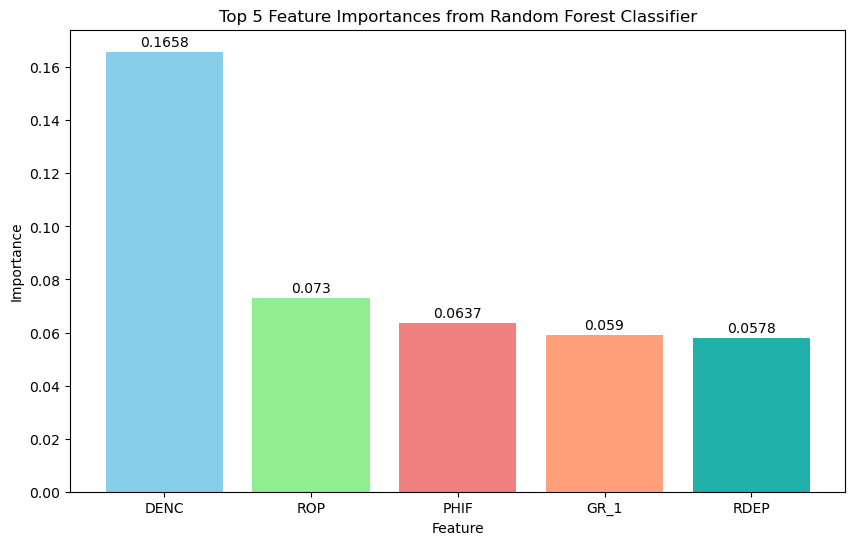

In [42]:
# Get feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_
features = train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot the top 5 feature importances as a histogram with different colors
top_5_features = importance_df.head(5)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_features['Feature'], top_5_features['Importance'], color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances from Random Forest Classifier')

# Adding the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.show()

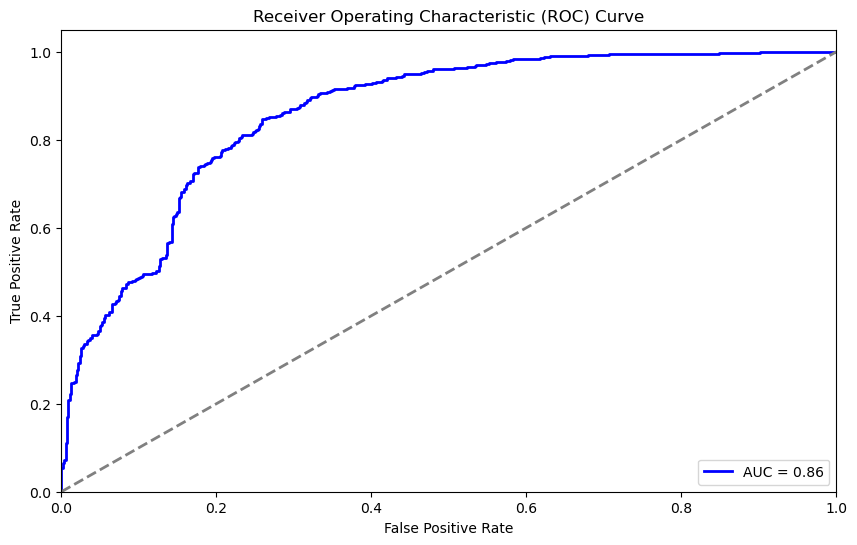

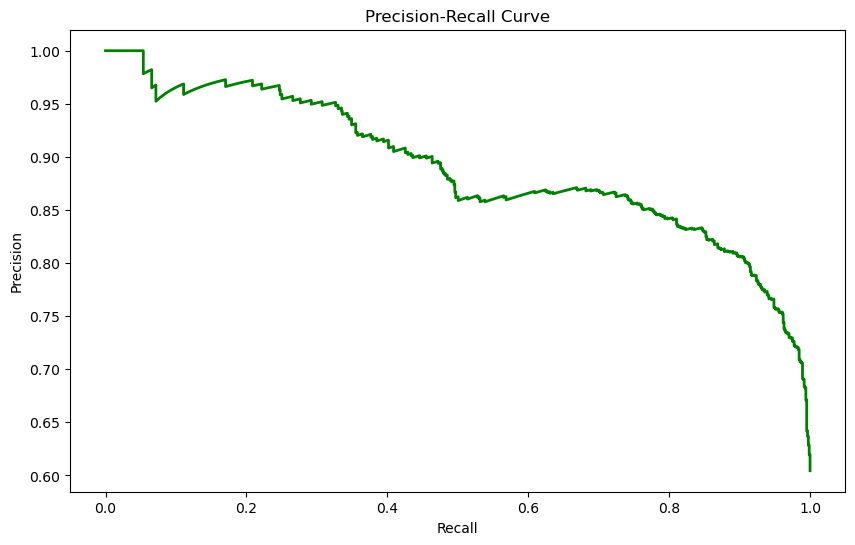

In [43]:

# Calculate ROC curve and AUC for the model with feature engineering
probs_with_engineering = rf.predict_proba(test)[:, 1]
fpr_with, tpr_with, _ = roc_curve(test_labels, probs_with_engineering)
roc_auc_with = auc(fpr_with, tpr_with)
precision_vals, recall_vals, _ = precision_recall_curve(test_labels, probs_with_engineering)

# Plot ROC curve for the model without feature engineering
plt.figure(figsize=(10, 6))
plt.plot(fpr_with, tpr_with, color='blue', lw=2, label='AUC = %.2f' % roc_auc_with)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.annotate(f"AUC = {roc_auc_with:.2f}", xy=(0.6, 0.2), fontsize=12, color='blue')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

